# Notebook Content

This notebook contains the calls to the functions in the packages/dev_thesis packages. The functions are used to generate the data for the thesis.

In [1]:
from packages.dev_thesis.gbq_utils import GBQUtils
from packages.dev_thesis.llm_utils import LLMUtils, FrameworkEval
import pandas as pd
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from google.api_core.exceptions import GoogleAPIError

# Run Eval

In [2]:
import json
import os

# change the working directory to the root of the project
os.chdir(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis')

# Specify the path to the JSON file
json_file_path = "data/de_data/questions_eval/questions_formated.json"

# Open the JSON file and load its contents into the 'questions' variable
with open(json_file_path, "r") as file:
    questions = json.load(file)

In [3]:
# selecet questions in which you would like to perform the evaluation.
questions_complex = [question for question in questions if question['complexity'] == 'COMPLEX']
questions_simple = [question for question in questions if question['complexity'] == 'SIMPLE']
questions_moderate = [question for question in questions if question['complexity'] == 'MODERATE']
all_questions = questions

questions = all_questions

In [4]:
from packages.dev_thesis.llm_utils import FrameworkEval
result = FrameworkEval().run_eval(models=['gpt-4-turbo'], chains=['colMetaGuidedDV'], questions = questions)

RUNNIG EVALUATION FOR MODEL: gpt-4-turbo AND CHAIN: colMetaGuidedDV
	 Question: What was the total revenue generated yesterday?
Client initialized successfully.
[{'role': 'system', 'content': 'You\'re a specialist in generating SQL code in Google Big Query syntax from business questions.\n\nYou\'re specialized in answering quesiton about the following table:\n"danish-endurance-analytics.nl2sql.amazon_orders" \n- This table records details of customer orders placed on Amazon. It includes comprehensive information about each order, such as the date of purchase, buyer\'s email details, and specifics about the product ordered, such as name, type, and quantity. \n- Primary Keys: The combination of order_id, (child_asin or e_conomic_number), and market define a unique row.\n\nHere are the columns present in "danish-endurance-analytics.nl2sql.amazon_orders":\norder_id: The unique identifier for each order.\npurchase_date: The date when the purchase was made.\nbuyer_email: The email address of

# Chains
Here you can run the individual chains used in this project

## SMT-NL2BI

In [ ]:
import json
import os

# change the working directory to the root of the project
os.chdir(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis')

# Specify the path to the JSON file
json_file_path = "data/de_data/questions_eval/questions_formated.json"

# Open the JSON file and load its contents into the 'questions' variable
with open(json_file_path, "r") as file:
    questions = json.load(file)

In [ ]:
questions

[{'table_id': 'amazon_orders',
  'question': 'What was the total revenue generated yesterday?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'How many items were sold in the last month?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'Can you provide the average daily sales volume for the previous month?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'How many different customers we had last week?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'How many orders were processed two days ago?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'What was the sales last Friday?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'Can you

In [ ]:
# select question from questions where question['question'] is equal to "Hello"
question= [question for question in questions if question['question'] == "What was the most popular product category sold last month?"][0]

# question = questions[11]
# question = questions[0]

question 

{'table_id': 'amazon_orders',
 'question': 'What was the most popular product category sold last month?',
 'complexity': 'SIMPLE',
 'query': None,
 'result': None}

In [ ]:
from packages.dev_thesis.llm_utils import LLMUtils, LLMQueryClassification
import json
llm = LLMUtils()
llm.ivoke_smtNL2BI(question=question, model='gpt-4-turbo')

Client initialized successfully.
Client initialized successfully.
##Invoking Query Classification Chain##
[{'role': 'system', 'content': 'You are required to analyze a business question posed by a user and categorize it. The questions are going to concern the table below:\n\nYou\'re specialized in the following table:\n"danish-endurance-analytics.nl2sql.amazon_orders" \n- This table records details of customer orders placed on Amazon. It includes comprehensive information about each order, such as the date of purchase, buyer\'s email details, and specifics about the product ordered, such as name, type, and quantity. \n\nColumns:\norder_id (STRING): The unique identifier for each order.\npurchase_date (DATE): The date when the purchase was made.\nbuyer_email (STRING): The email address of the buyer who made the purchase.\nmarket_alpha_2_code (STRING): The alpha code 2 of the market where the order was placed.\nchild_asin (STRING): The unique identifier for the specific product variant p

({'id': None,
  'created_at': None,
  'sql_query': None,
  'total_tokens': None,
  'user_question': 'What was the most popular product category sold last month?',
  'classifier_results': {'allowed': {'products': [],
    'countries_alpha_2_code': [],
    'financial_metrics': [],
    'growth_metrics': [],
    'date_range': [{'last_dates': {'found': 1,
       'description': 'Use this category when the user asks for data from a specific previous period such as the last few days, weeks, months, or years. This includes any request involving a time frame ending before the current period (e.g., last week, last month, last year)',
       'calculation_guidelines': "To calculate previous/last date ranges use the following guidelines:\n- A week is defined from Monday to Sunday, thus use WEEK(MONDAY) when performing DATE_TRUNC().\n- Use the current date (CURRENT_DATE()) as the base date for all calculations.\n- Exclude the ongoing period in your calculations. For example, if asked for the 'last wee

### Classifier

#### Sys Message

In [ ]:
query_id = 'chatcmpl-9dVtLLXK5iQqDTmTDSvyNKMJSPOg3'

In [ ]:
from packages.dev_thesis.llm_utils import HelperFunctions
print(HelperFunctions().get_classifier_sysmessage_by_id(query_id=query_id))

You are required to analyze a business question posed by a user and categorize it. The questions are going to concern the table below:

You're specialized in the following table:
"danish-endurance-analytics.nl2sql.amazon_orders" 
- This table records details of customer orders placed on Amazon. It includes comprehensive information about each order, such as the date of purchase, buyer's email details, and specifics about the product ordered, such as name, type, and quantity. 

Columns:
order_id (STRING): The unique identifier for each order.
purchase_date (DATE): The date when the purchase was made.
buyer_email (STRING): The email address of the buyer who made the purchase.
market_alpha_2_code (STRING): The alpha code 2 of the market where the order was placed.
child_asin (STRING): The unique identifier for the specific product variant purchased; can be used interchangeably with economic number
e_conomic_number (STRING): A unique economic identifier associated with the product; can be 

In [ ]:
print(HelperFunctions().get_classifier_prompt_by_id(query_id=query_id))

## Instructions ##

Example Input 1:
"Can you show me the sales figures YoY and conversion rate from the last 30 days for hiking classic socks in the United Kingdom?"

Expected JSON Output 1:
{
    "allowed": {
        "date_range": ['last_dates'],
        "financial_metrics": ['sales'],
        "growth_metrics": ['YoY'],
        "products": ['hiking classic socks'],
        "markets": ['UK'],
    },

    "not_allowed": {
        "financial_metrics": ['conversion_rate'],
        "growth_metrics": [],
    }
}

Example Input 2:
"How many orders there were last week that included Baselayer or Male underwear in the french market?"

Expected JSON Output 2:
{
    "allowed": {
        "date_range": ['last_dates'],
        "financial_metrics": ['no_orders'],
        "growth_metrics": [],
        "products": ['Baselayer','Male Underwear'],
        "markets": ['FR'],
    },

    "not_allowed": {
        "financial_metrics": [],
        "growth_metrics": [],
    }
}

Example Input 3:
"What was th

### SQL-Code Generator

In [ ]:
query_id = 'chatcmpl-9dW5Fni4PPPEoZ98OiUXO5bkU3YNH'

In [ ]:
from packages.dev_thesis.llm_utils import HelperFunctions
print(HelperFunctions().get_prompt_by_id(query_id=query_id))

Generate SQL query using Google Big Query Syntax only and with no explanation. Pay attention on the intructions below.

## Instructions ##
###Growth Metrics Instructions###
YoY:
- You must not use window functions to perform the calculations - Instead use JOINs.
- When performing the joins, ensure that you use the functions ISOWEEK, DAYOFWEEK, and ISOYEAR. This approach ensures that the calculation is based not on the calendar week but on the same day of the week (DAYOFWEEK), ISO week (ISOWEEK), and the previous ISO year (ISOYEAR).
- Don't use EXTRACT(DAY) function, only EXTRACT(DAYOFWEEK)
 Example Question: What is the YoY sales on a weekly basis for the past 40 weeks for the UK market?
Example SQL Query:
WITH processed_data AS (
  SELECT
    date_trunc(purchase_date, week(monday)) as week,
    sum(gross_sales) as sales
  FROM danish-endurance-analytics.nl2sql.amazon_orders
  WHERE
    market_alpha_2_code = 'UK'
    AND date_trunc(purchase_date, week(monday)) <> DATE_TRUNC(current_dat

In [ ]:
print(HelperFunctions().get_sql_query_by_id(query_id=query_id))

SELECT 
  SUM(gross_sales) AS total_revenue
FROM 
  `danish-endurance-analytics.nl2sql.amazon_orders`
WHERE 
  purchase_date = DATE_SUB(CURRENT_DATE(), INTERVAL 1 DAY)


#### Get SQL Query from File to be tested

In [ ]:
from packages.dev_thesis.llm_utils import HelperFunctions
print(HelperFunctions().get_sql_query_by_id(query_id='chatcmpl-9LwkPlc6tdOIapsDaeeymc9LMhz9N'))

In [ ]:
from packages.dev_thesis.llm_utils import HelperFunctions
print(HelperFunctions().get_prompt_by_id(query_id='chatcmpl-9LwkPlc6tdOIapsDaeeymc9LMhz9N'))

## Simple Vanilla Chain

In [ ]:
from packages.dev_thesis.llm_utils import LLMUtils, FrameworkEval
llm = LLMUtils()
formated_response = llm.invoke_simple_chain_vanilla(user_question='What is the YoY sales by Month for the Product Hiking Classic Socks?')

## OpenAI Vanilla Chain

In [1]:
import json
import os

# change the working directory to the root of the project
os.chdir(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis')

# Specify the path to the JSON file
json_file_path = "data/de_data/questions_eval/questions_formated.json"

# Open the JSON file and load its contents into the 'questions' variable
with open(json_file_path, "r") as file:
    questions = json.load(file)

question = questions[59]
question

{'table_id': 'amazon_orders',
 'question': 'What was the YoY growth in number of orders of last week?',
 'complexity': 'COMPLEX',
 'query': None,
 'result': None}

In [2]:
from packages.dev_thesis.llm_utils import LLMUtils 
llm = LLMUtils()
formatted_response, response = llm.invoke_openAI_vanilla(question=question, model='gpt-3.5-turbo')
response

Client initialized successfully.
[{'role': 'user', 'content': "### Generate Google Big Query SQL query only and with no explanation\n### Here is the SQL table , with their properties:\n#\n# danish-endurance-analytics.nl2sql.amazon_orders('order_id', 'purchase_date', 'buyer_email', 'market_alpha_2_code', 'child_asin', 'e_conomic_number', 'product_marketing_category', 'product_name', 'product_pack', 'product_and_pack', 'product_category', 'product_type', 'product_size', 'product_colour', 'gross_sales', 'units_sold')\n#\n### What was the YoY growth in number of orders of last week?\n\n\n"}]
SELECT 
    COUNT(order_id) AS num_orders_last_week,
    COUNT(order_id) - LAG(COUNT(order_id), 52) OVER (ORDER BY purchase_date) AS yoy_growth
FROM 
    danish-endurance-analytics.nl2sql.amazon_orders
WHERE 
    purchase_date >= DATE_SUB(CURRENT_DATE(), INTERVAL 1 WEEK)
GROUP BY 
    WEEK(purchase_date)
ORDER BY 
    WEEK(purchase_date) DESC
LIMIT 1;
## Query Produced an Error ##
	 A query error occur

ChatCompletion(id='chatcmpl-9dVppyh5qHZbkGvxgAofWXoS4jSQg', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='SELECT \n    COUNT(order_id) AS num_orders_last_week,\n    COUNT(order_id) - LAG(COUNT(order_id), 52) OVER (ORDER BY purchase_date) AS yoy_growth\nFROM \n    danish-endurance-analytics.nl2sql.amazon_orders\nWHERE \n    purchase_date >= DATE_SUB(CURRENT_DATE(), INTERVAL 1 WEEK)\nGROUP BY \n    WEEK(purchase_date)\nORDER BY \n    WEEK(purchase_date) DESC\nLIMIT 1;', role='assistant', function_call=None, tool_calls=None))], created=1719204193, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=96, prompt_tokens=132, total_tokens=228))

## Full Context Chain

In [ ]:
import json
import os

# change the working directory to the root of the project
os.chdir(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis')

# Specify the path to the JSON file
json_file_path = "data/de_data/questions_eval/questions_formated.json"

# Open the JSON file and load its contents into the 'questions' variable
with open(json_file_path, "r") as file:
    questions = json.load(file)

In [ ]:

question = questions[59]
question

In [ ]:
from packages.dev_thesis.llm_utils import LLMUtils
llm = LLMUtils()
llm.invoke_full_context_chain(model='gpt-4-turbo', question=question)

## Explained Chain

In [ ]:
import json
import os

# change the working directory to the root of the project
os.chdir(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis')

# Specify the path to the JSON file
json_file_path = "data/de_data/questions_eval/questions_formated.json"

# Open the JSON file and load its contents into the 'questions' variable
with open(json_file_path, "r") as file:
    questions = json.load(file)

In [ ]:
questions[55]

In [ ]:
# select question from questions where question['question'] is equal to "Hello"
question= [question for question in questions if question['question'] == "How many items were sold in the last month?"][0]
question

In [ ]:
from packages.dev_thesis.llm_utils import LLMUtils
llm = LLMUtils()
llm.invoke_explained_chain(model='gpt-4-turbo', question=question)

In [ ]:
query_id='chatcmpl-9NIr38UHNIm12C1d2OwOZZ86ICvKX'
from packages.dev_thesis.llm_utils import HelperFunctions
print(HelperFunctions().get_sql_query_by_id(query_id=query_id))

## LLMQueryClassification

In [1]:
import json
import os
from packages.dev_thesis.llm_utils import LLMUtils, LLMQueryClassification

# change the working directory to the root of the project
os.chdir(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis')

# Specify the path to the JSON file
json_file_path = "data/de_data/questions_eval/questions_formated.json"

# Open the JSON file and load its contents into the 'questions' variable
with open(json_file_path, "r") as file:
    questions = json.load(file)
questions

[{'table_id': 'amazon_orders',
  'question': 'What was the total revenue generated yesterday?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'How many items were sold in the last month?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'Can you provide the average daily sales volume for the previous month?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'How many different customers we had last week?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'How many orders were processed two days ago?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'What was the sales last Friday?',
  'complexity': 'SIMPLE',
  'query': None,
  'result': None},
 {'table_id': 'amazon_orders',
  'question': 'Can you

In [2]:
question = questions[59]
question

{'table_id': 'amazon_orders',
 'question': 'What was the YoY growth in number of orders of last week?',
 'complexity': 'COMPLEX',
 'query': None,
 'result': None}

In [3]:
llm_classifier = LLMQueryClassification()
response = llm_classifier.invoke_query_classification_chain(user_question=question)
response

Client initialized successfully.
##Invoking Query Classification Chain##
[{'role': 'system', 'content': 'You are required to analyze a business question posed by a user and categorize it. The questions are going to concern the table below:\n\nYou\'re specialized in the following table:\n"danish-endurance-analytics.nl2sql.amazon_orders" \n- This table records details of customer orders placed on Amazon. It includes comprehensive information about each order, such as the date of purchase, buyer\'s email details, and specifics about the product ordered, such as name, type, and quantity. \n\nColumns:\norder_id (STRING): The unique identifier for each order.\npurchase_date (DATE): The date when the purchase was made.\nbuyer_email (STRING): The email address of the buyer who made the purchase.\nmarket_alpha_2_code (STRING): The alpha code 2 of the market where the order was placed.\nchild_asin (STRING): The unique identifier for the specific product variant purchased; can be used interchange

{'allowed': {'date_range': ['last_dates'],
  'financial_metrics': ['no_orders'],
  'growth_metrics': ['YoY'],
  'products': [],
  'markets': []},
 'not_allowed': {'financial_metrics': [], 'growth_metrics': []}}

In [ ]:
# inspect system messages and prompt
query_id = 'x'

In [ ]:
from packages.dev_thesis.llm_utils import HelperFunctions
print(HelperFunctions().get_classifier_prompt_by_id(query_id=query_id))

In [ ]:
from packages.dev_thesis.llm_utils import HelperFunctions
print(HelperFunctions().get_classifier_sysmessage_by_id(query_id=query_id))

## LLM Tabular2NL

In [ ]:
from packages.dev_thesis.llm_utils import LLMUtils, FrameworkEval, LLManswerability, LLMTabular2NL
llm = LLMTabular2NL()

In [ ]:
csv_file = 'x'

# read csv file into string variable
with open(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis\data\de_data\logging\logging_results\chatcmpl-983OmmzXN0tthezzabSRDhJTBPLCR.csv', 'r') as file:
    data = file.read()

data

In [ ]:
llm.invoke_tabular2sql_chain(user_question='What was the total revenue generated yesterday?', tabular_response=data)

# MVP 6 - Question Categorization

## Dynamically Generate System Messages based on JSON files

In [12]:
# how to fetch todays date as a string in the format "Day of Month Year"
from datetime import datetime
datetime.today().strftime('%A %d %B %Y')


'Sunday 16 June 2024'

In [13]:
from packages.dev_thesis.llm_utils import LLMUtils
llm = LLMUtils()
CHEMA_LINKING_LOOKUP, GROWTH_METRICS_LOOKUP, FINANCIAL_METRICS_LOOKUP, DATERANGE_METRICS_LOOKUP = llm.get_lookups()

DATERANGE_METRICS_LOOKUP

for key, value in DATERANGE_METRICS_LOOKUP.items():
    print(key)
    print(value['description'])


Client initialized successfully.
last_dates
When user asks for previous or last x days, months, years or any other date_range
specific_dates
When user asks for specific dates


In [14]:
from packages.dev_thesis.llm_utils import Format, LLMQueryClassification
llm = LLMQueryClassification()
prompt_template = llm.load_template_from_file(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis\data\de_data\prompt_template\5_query_classifier\qc_dynamic_system_message.txt')

print(Format().get_sysmessage_classification(prompt_template))

Client initialized successfully.
You are required to analyze a business question posed by a user and categorize it into four predefined categories: 
- date_range, 
- financial_metrics
- growth_metrics
- products
- countries_alpha_2_code

Extract relevant details from the question and classify them as 'allowed' if they fall within the predefined metrics, or 'not_allowed' if they do not.

# Allowed metrics are:

## date_range:
- last_dates: When user asks for previous or last x days, months, years or any other date_range
- specific_dates: When user asks for specific dates

## financial_metrics:
- units: Whenver the user asks for units sold
- sales: Any metrics related to sales, including 'sales', 'revenue', 'net sales', 'top sales'.
- no_orders: Number of Orders
- no_customers: Number of Customers
- basket_size: The average number of items per order.
- basket_value: Refers to the total amount of money a customer is expected to spend on a single shopping sessio

## growth_metrics:
- YoY: 

# Query Classification Functions

## 1. process_classification()
Checks if the values are found in the lookups and returns the information of them.

In [26]:
from packages.dev_thesis.llm_utils import LLMUtils, LLMQueryClassification
llm = LLMQueryClassification()

Client initialized successfully.


In [27]:
classification ={
            "allowed": {
                "date_range": [
                    "last_dates"
                ],
                "financial_metrics": [
                    "no_orders"
                ],
                "growth_metrics": [
                    "YoY"
                ],
                "products": [],
                "countries_alpha_2_code": []
            },
            "not_allowed": {
                "financial_metrics": [],
                "growth_metrics": []
            }
            }

classified = llm.process_classification(classification)  
classified

{'allowed': {'products': [],
  'countries_alpha_2_code': [],
  'financial_metrics': [{'no_orders': {'found': 1,
     'description': 'Number of Orders',
     'calculation_guidelines': 'Use COUNT(distinct order_id) in order to get the proper number of order.',
     'calculation_example': None}}],
  'growth_metrics': [{'YoY': {'found': 1,
     'description': 'Directly relates to the measurement of growth, with specific reference to annual comparisons.',
     'calculation_guidelines': "- You must not use window functions to perform the calculations - Instead use JOINs.\n- When performing the joins, ensure that you use the functions ISOWEEK, DAYOFWEEK, and ISOYEAR. This approach ensures that the calculation is based not on the calendar week but on the same day of the week (DAYOFWEEK), ISO week (ISOWEEK), and the previous ISO year (ISOYEAR).\n- Don't use EXTRACT(DAY) function, only EXTRACT(DAYOFWEEK)",
     'calculation_example': "Example Question: What is the YoY sales on a weekly basis for

## 2. get_classification_guidelines()
Returns the classification guidelines for the given classification. This is used later for prompt engineering

In [28]:
from packages.dev_thesis.llm_utils import Format

classifier_guidelines = Format().get_classification_guidelines(classified)

print(classifier_guidelines)

###Growth Metrics Instructions###
YoY:
- You must not use window functions to perform the calculations - Instead use JOINs.
- When performing the joins, ensure that you use the functions ISOWEEK, DAYOFWEEK, and ISOYEAR. This approach ensures that the calculation is based not on the calendar week but on the same day of the week (DAYOFWEEK), ISO week (ISOWEEK), and the previous ISO year (ISOYEAR).
- Don't use EXTRACT(DAY) function, only EXTRACT(DAYOFWEEK)
 Example Question: What is the YoY sales on a weekly basis for the past 40 weeks for the UK market?
Example SQL Query:
WITH processed_data AS (
  SELECT
    date_trunc(purchase_date, week(monday)) as week,
    sum(gross_sales) as sales
  FROM danish-endurance-analytics.nl2sql.amazon_orders
  WHERE
    market_alpha_2_code = 'UK'
    AND date_trunc(purchase_date, week(monday)) <> DATE_TRUNC(current_date(), week(monday))
  GROUP BY week
)
SELECT
  this_year.week as this_year_week,
  last_year.week as last_year_week,

  this_year.sales as t

## 3. decide_if_question_is_answerable()

In [ ]:
from packages.dev_thesis.llm_utils import LLMUtils, LLMQueryClassification
import json
llm = LLMQueryClassification()

classification = {'allowed': {'date_range': ['last_dates','x'],
  'financial_metrics': ['no_orders'],
  'growth_metrics': ['YoY', 'dates'],
  'products': ['Bamboo Dress Socks', 'Baselayer', 'Hiking Classic Socks'],
  'countries_alpha_2_code': ['JP']
  },
 'not_allowed': {
  'growth_metrics': ['YoY'],
  'financial_metrics': []}}


classified = llm.process_classification(classification)  
classified

Client initialized successfully.


{'allowed': {'products': [{'Bamboo Dress Socks': {'found': 1,
     'field_name': 'product_type'}},
   {'Baselayer': {'found': 1, 'field_name': 'product_marketing_category'}},
   {'Hiking Classic Socks': {'found': 1, 'field_name': 'product_type'}}],
  'countries_alpha_2_code': [{'JP': {'found': 1,
     'field_name': 'market_alpha_2_code'}}],
  'financial_metrics': [{'no_orders': {'found': 1,
     'description': 'Number of Orders',
     'calculation_guidelines': 'Use COUNT(distinct order_id) in order to get the proper number of order.',
     'calculation_example': None}}],
  'growth_metrics': [{'YoY': {'found': 1,
     'description': 'Directly relates to the measurement of growth, with specific reference to annual comparisons.',
     'calculation_guidelines': "- You must not use window functions to perform the calculations - Instead use JOINs.\n- When performing the joins, ensure that you use the functions ISOWEEK, DAYOFWEEK, and ISOYEAR. This approach ensures that the calculation is bas

In [ ]:
llm.decide_if_question_is_answerable(classified)

(False,
 {'products': ['Bamboo Dress Socks', 'Baselayer', 'Hiking Classic Socks'],
  'financial_metrics': ['no_orders'],
  'growth_metrics': ['YoY'],
  'date_range': ['last_dates'],
  'countries_alpha_2_code': ['JP']},
 {'growth_metrics': ['dates'], 'date_range': ['x']})

In [ ]:
from packages.dev_thesis.llm_utils import MetadataLoader
# get full prompt
prompt_template = llm.load_template_from_file(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis\data\de_data\prompt_template\1_openAI_baseline\openAIBaseline_classifier_prompt.txt')

table_schema = MetadataLoader.get_all_metadata(r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis\data\de_data\prompt_template\1_openAI_baseline\openAiBaseline_table_schema.txt')

user_question = 'What was the WoW sales performance of Running Wear in the UK and Germany during the last three months?'


print(Format.get_prompt_simple_with_classifier(user_question = user_question, prompt_template = prompt_template, table_schema=table_schema, classifier_guidelines=classifier_guidelines))

# Utils


## Run SQL Query

In [1]:
sql_query='SELECT\n    distinct product_marketing_category as product_category,\n    1 as count\nFROM danish-endurance-analytics.nl2sql.amazon_orders\n'

In [2]:
from packages.dev_thesis.gbq_utils import GBQUtils
gbq = GBQUtils()
resultss = gbq.run_query(sql_query)

Query executed successfully. 13 rows returned.


## SQL String Converter

In [2]:
text = '''
Question Example: hat was the sales last weel?
Example Output:
SELECT 
  sum(gross_sales)
  FROM
    `danish-endurance-analytics.nl2sql.amazon_orders`
WHERE DATE_TRUNC(purchase_date, WEEK(monday)) IN (
  DATE_TRUNC(DATE_SUB(CURRENT_DATE(), INTERVAL 1 WEEK), WEEK(monday))
)
'''
text

'\nQuestion Example: hat was the sales last weel?\nExample Output:\nSELECT \n  sum(gross_sales)\n  FROM\n    `danish-endurance-analytics.nl2sql.amazon_orders`\nWHERE DATE_TRUNC(purchase_date, WEEK(monday)) IN (\n  DATE_TRUNC(DATE_SUB(CURRENT_DATE(), INTERVAL 1 WEEK), WEEK(monday))\n)\n'

In [1]:
text = "Example Question: What was the sales last month?\nSQL Query Example:\n```sql\nSELECT \n  sum(gross_sales)\nFROM \n  `danish-endurance-analytics.nl2sql.amazon_orders`\nWHERE \n  purchase_date BETWEEN DATE_TRUNC(DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH), MONTH) \n  AND LAST_DAY(DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH))\n```"
print(text)

Example Question: What was the sales last month?
SQL Query Example:
```sql
SELECT 
  sum(gross_sales)
FROM 
  `danish-endurance-analytics.nl2sql.amazon_orders`
WHERE 
  purchase_date BETWEEN DATE_TRUNC(DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH), MONTH) 
  AND LAST_DAY(DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH))
```


## Convert csv to text

In [ ]:
# load a csv and convert it to a string
import csv
from io import StringIO

with open(r'C:\Users\GiovanniGomesGuerrei\Downloads\bquxjob_44cc4251_18fa9a2f8b6.csv', 'r') as file:
    data = file.read()

data

## Count Distinct Values


In [7]:
import json

def extract_distinct_counts(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
        
    distinct_counts = {}
    for field in data['fields']:
        field_name = field['field_name']
        distinct_values = field.get('distinct_values', [])
        distinct_counts[field_name] = len(distinct_values)
        
    return distinct_counts

# Usage example:
json_file_path = r'G:\My Drive\Profissional & Acadêmico\Mestrados\DTU\5_thesis\dev_thesis\data\de_data\table_metadata\fields_look_up.json'
distinct_counts = extract_distinct_counts(json_file_path)

# Display the results
for field_name, count in distinct_counts.items():
    print(f"Field '{field_name}' has {count} distinct values.")


Field 'market_alpha_2_code' has 14 distinct values.
Field 'child_asin' has 2104 distinct values.
Field 'e_conomic_number' has 2103 distinct values.
Field 'product_marketing_category' has 13 distinct values.
Field 'product_name' has 2105 distinct values.
Field 'product_pack' has 6 distinct values.
Field 'product_and_pack' has 154 distinct values.
Field 'product_category' has 3 distinct values.
Field 'product_type' has 111 distinct values.
Field 'product_size' has 20 distinct values.
Field 'product_colour' has 203 distinct values.


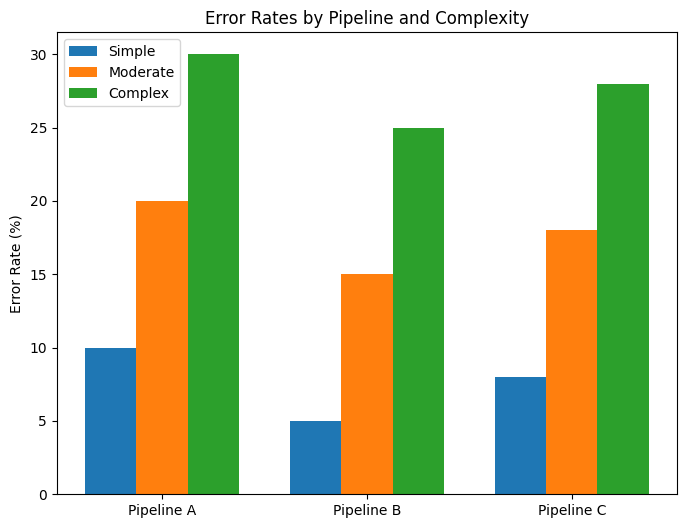

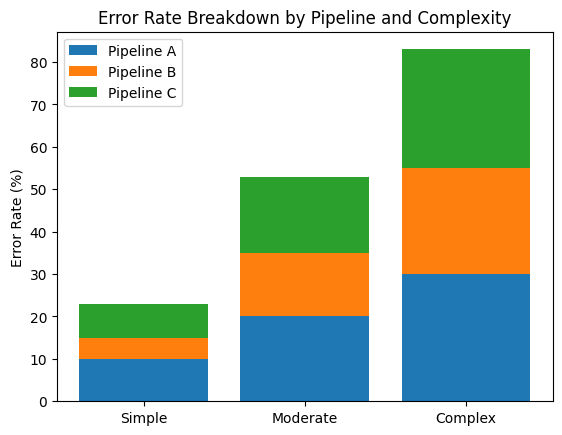

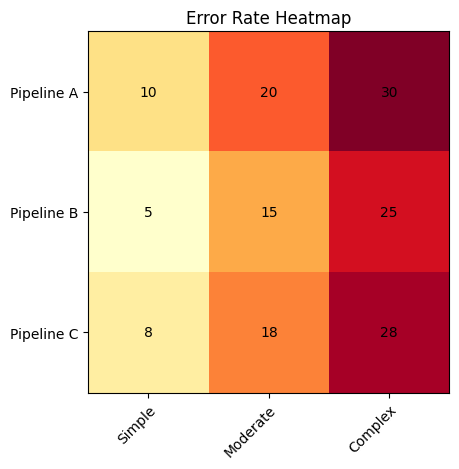

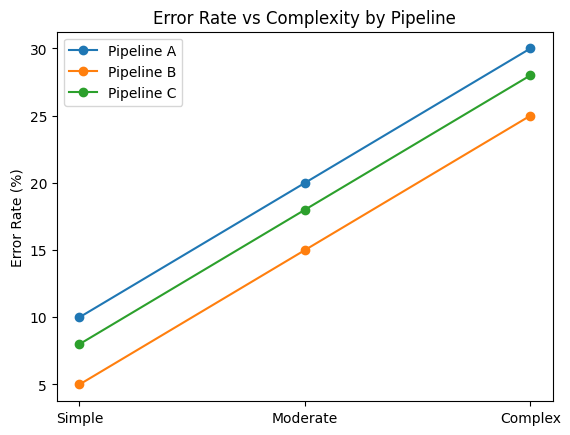

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
pipelines = ['Pipeline A', 'Pipeline B', 'Pipeline C']
complexities = ['Simple', 'Moderate', 'Complex']
error_rates = np.array([[10, 20, 30], 
                        [5, 15, 25],
                        [8, 18, 28]])

# 1. Grouped Bar Chart
fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(pipelines))
width = 0.25
for i, complexity in enumerate(complexities):
    ax.bar(x + i*width, error_rates[:, i], width, label=complexity)
ax.set_xticks(x + width)
ax.set_xticklabels(pipelines)
ax.set_ylabel('Error Rate (%)')
ax.set_title('Error Rates by Pipeline and Complexity')
ax.legend()

# 2. Stacked Bar Chart
fig, ax = plt.subplots()
bottom = np.zeros(len(complexities))
for i, pipeline in enumerate(pipelines):
    ax.bar(complexities, error_rates[i], bottom=bottom, label=pipeline)
    bottom += error_rates[i]
ax.set_ylabel('Error Rate (%)')
ax.set_title('Error Rate Breakdown by Pipeline and Complexity')
ax.legend()

# 3. Heatmap
fig, ax = plt.subplots()
im = ax.imshow(error_rates, cmap='YlOrRd')
ax.set_xticks(np.arange(len(complexities)))
ax.set_yticks(np.arange(len(pipelines)))
ax.set_xticklabels(complexities)
ax.set_yticklabels(pipelines)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(pipelines)):
    for j in range(len(complexities)):
        ax.text(j, i, error_rates[i, j], ha="center", va="center", color="black")
ax.set_title("Error Rate Heatmap")
fig.tight_layout()
  
# 4. Line Chart  
fig, ax = plt.subplots()
for i, pipeline in enumerate(pipelines):
    ax.plot(complexities, error_rates[i], marker='o', label=pipeline)
ax.set_ylabel('Error Rate (%)')
ax.set_title('Error Rate vs Complexity by Pipeline')
ax.legend()

plt.show()

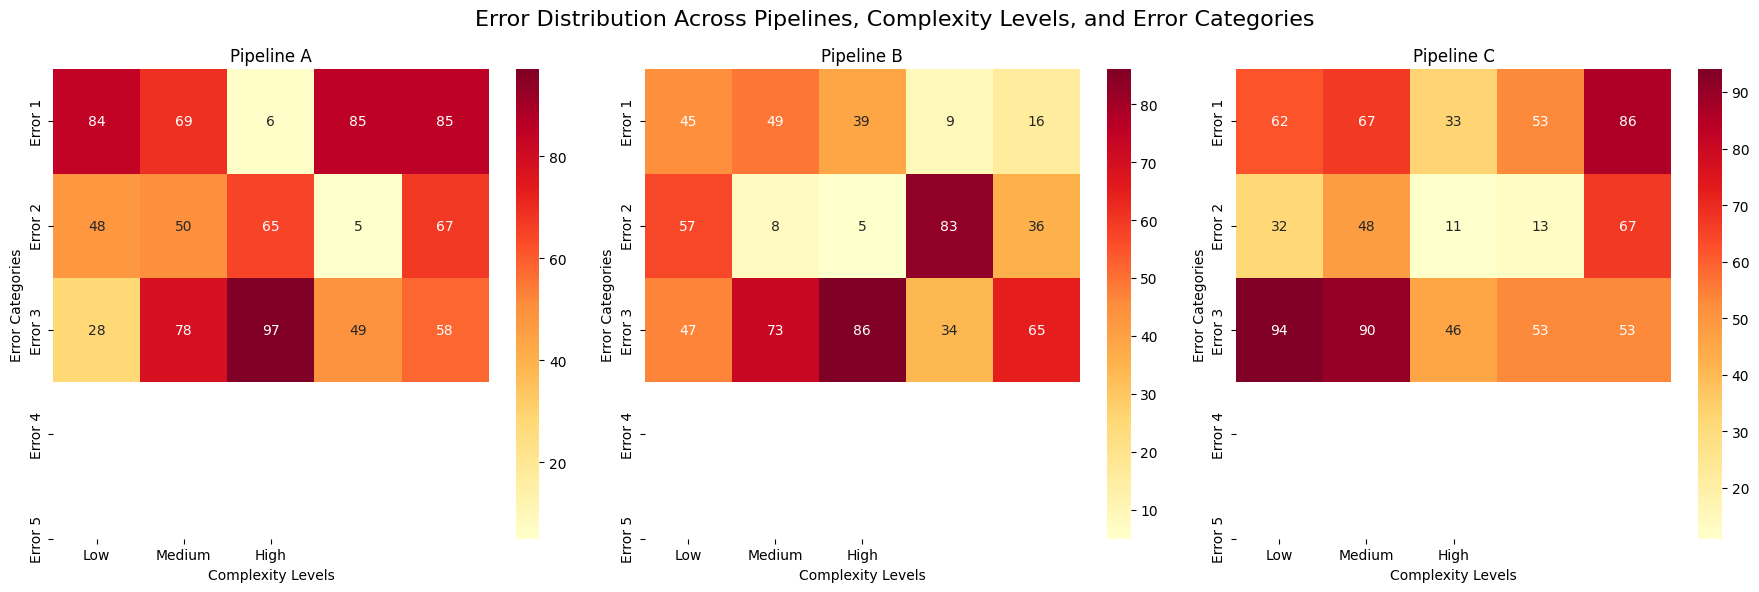


Pipeline A:
  Low complexity:
    Error 1: 84
    Error 2: 69
    Error 3: 6
    Error 4: 85
    Error 5: 85
  Medium complexity:
    Error 1: 48
    Error 2: 50
    Error 3: 65
    Error 4: 5
    Error 5: 67
  High complexity:
    Error 1: 28
    Error 2: 78
    Error 3: 97
    Error 4: 49
    Error 5: 58

Pipeline B:
  Low complexity:
    Error 1: 45
    Error 2: 49
    Error 3: 39
    Error 4: 9
    Error 5: 16
  Medium complexity:
    Error 1: 57
    Error 2: 8
    Error 3: 5
    Error 4: 83
    Error 5: 36
  High complexity:
    Error 1: 47
    Error 2: 73
    Error 3: 86
    Error 4: 34
    Error 5: 65

Pipeline C:
  Low complexity:
    Error 1: 62
    Error 2: 67
    Error 3: 33
    Error 4: 53
    Error 5: 86
  Medium complexity:
    Error 1: 32
    Error 2: 48
    Error 3: 11
    Error 4: 13
    Error 5: 67
  High complexity:
    Error 1: 94
    Error 2: 90
    Error 3: 46
    Error 4: 53
    Error 5: 53


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
pipelines = ['Pipeline A', 'Pipeline B', 'Pipeline C']
complexity_levels = ['Low', 'Medium', 'High']
error_categories = ['Error 1', 'Error 2', 'Error 3', 'Error 4', 'Error 5']

# Generate random data for demonstration
data = np.random.randint(0, 100, size=(3, 3, 5))

# Create a figure with subplots for each pipeline
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Error Distribution Across Pipelines, Complexity Levels, and Error Categories', fontsize=16)

# Create a heatmap for each pipeline
for i, (ax, pipeline) in enumerate(zip(axes, pipelines)):
    sns.heatmap(data[i], ax=ax, cmap='YlOrRd', annot=True, fmt='d', 
                xticklabels=complexity_levels, yticklabels=error_categories)
    ax.set_title(f'{pipeline}')
    ax.set_xlabel('Complexity Levels')
    ax.set_ylabel('Error Categories')

plt.tight_layout()
plt.show()

# Print the data for reference
for i, pipeline in enumerate(pipelines):
    print(f"\n{pipeline}:")
    for j, level in enumerate(complexity_levels):
        print(f"  {level} complexity:")
        for k, category in enumerate(error_categories):
            print(f"    {category}: {data[i, j, k]}")